# Import Libraries

In [1]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt 
import glob 
import os
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

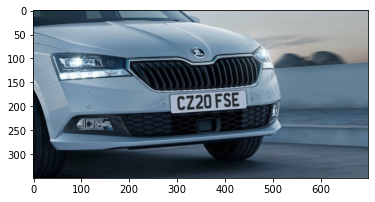

In [2]:
#Read Image
numplate_img = cv2.imread('car_image.jpeg')
numplate_img_rgb = cv2.cvtColor(numplate_img, cv2.COLOR_BGR2RGB)
plt.imshow(numplate_img_rgb)

In [3]:
numplate_haar_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [4]:
# Setup function to detect car plate
def numplate_detect(image):
    numplate_overlay = image.copy() 
    numplate_rects = numplate_haar_cascade.detectMultiScale(numplate_overlay,scaleFactor=1.1, minNeighbors=3)
    for x,y,w,h in numplate_rects: 
        cv2.rectangle(numplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 

    return numplate_overlay

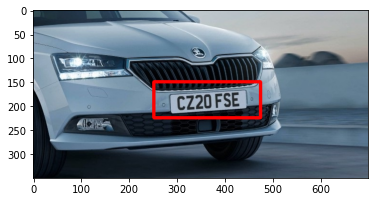

In [5]:
detected_numplate_img = numplate_detect(numplate_img_rgb)
plt.imshow(detected_numplate_img)

In [6]:
# Create function to retrieve only the car plate region itself
def numplate_extract(image):
    numplate_rects = numplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=5)
    for x,y,w,h in numplate_rects: 
        numplate_img = image[y+15:y+h-10 ,x+15:x+w-20]
        
    return numplate_img

In [7]:
# Enlarge image for further processing later on
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

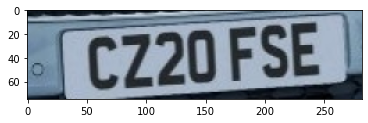

In [8]:
# Display extracted car license plate image
numplate_extract_img = numplate_extract(numplate_img_rgb)
numplate_extract_img = enlarge_img(numplate_extract_img, 150)
plt.imshow(numplate_extract_img);

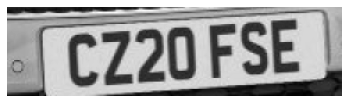

In [9]:
# Convert image to grayscale
numplate_extract_img_gray = cv2.cvtColor(numplate_extract_img, cv2.COLOR_RGB2GRAY)
plt.axis('off') 
plt.imshow(numplate_extract_img_gray, cmap = 'gray');

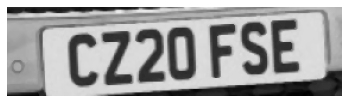

In [10]:
# Apply median blur
numplate_extract_img_gray_blur = cv2.medianBlur(numplate_extract_img_gray,3) # kernel size 3
plt.axis('off') 
plt.imshow(numplate_extract_img_gray_blur, cmap = 'gray');

In [11]:
# Display the text extracted from the car plate
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
print(pytesseract.image_to_string(numplate_extract_img_gray_blur, config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

CZ20FSE

